In [3]:
import numpy as np
rand = np.random.RandomState(42)

In [4]:
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [5]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [7]:
ind = [3, 7, 2]
x[ind]

array([71, 86, 14])

In [8]:
# result is the shape of the index arrays, not the shape of the array being indexed

ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [9]:
# works in multiple dimensions

X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [10]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [12]:
# results are x[0, 2], x[1, 1,], x[2, 3]
# the pairing indices follows the broadcasting rules

print(row[:, np.newaxis])

X[row[:, np.newaxis], col]

[[0]
 [1]
 [2]]


array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [13]:
## Combined indexing

print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [14]:
# combine fancy and simple

X[2, [2, 0, 1]]

array([10,  8,  9])

In [15]:
# combine fancy indexing with slicing

X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [20]:
# combine fancy with masking

mask = np.array([1, 0, 1, 0], dtype=bool)
print(mask)
print(row[:, np.newaxis])
X[row[:, np.newaxis], mask]

[ True False  True False]
[[0]
 [1]
 [2]]


array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [23]:
## Selecting random points example

mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

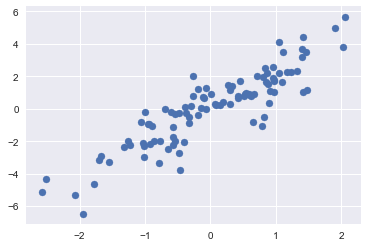

In [25]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:, 0], X[:, 1]);

In [27]:
# get 20 random points

indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([82, 36, 27, 98, 55,  8, 81, 23, 12, 17, 49, 21, 96, 60, 56, 70, 87,
        5, 78, 76])

In [28]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

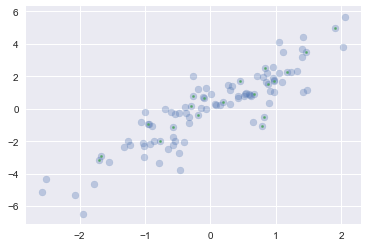

In [33]:
# overplot large circles on selected points

plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], s=5);

In [34]:
## Modifying values with fancy indexing

In [42]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [43]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [44]:
# repeated indices can be a bit confusing, here 4 is written first, and then immediately overwritten by 6

x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [45]:
# += is shorthand for x[i] = x[i] + 1, the assignment happens multiple times here instead of the addition
# so the result is not what might be expected

i = [2, 3, 3, 4, 4, 4]
x[i] += 1
print(x)

[6. 0. 1. 1. 1. 0. 0. 0. 0. 0.]


In [46]:
# using .at will do what may be desired

x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [47]:
## Binning data

# can create a histogram by hand

In [66]:
x = np.random.randn(100)

# compute histogram
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find appropriate bin for each
i = np.searchsorted(bins, x)

# add 1 to each of the bins
np.add.at(counts, i, 1)

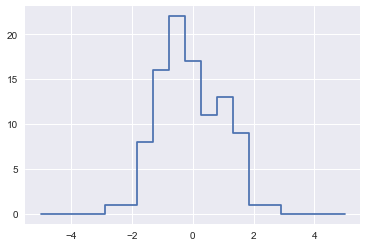

In [52]:
# plot the results

plt.plot(bins, counts, linestyle='steps');

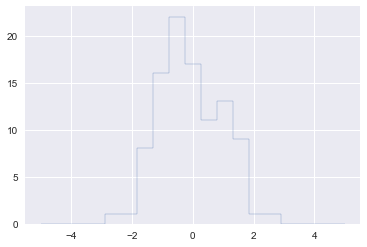

In [53]:
# matplotlib has this built in already
plt.hist(x, bins, histtype='step');

In [54]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
45.5 µs ± 776 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
9.77 µs ± 30.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [56]:
# numpy's becomes more performant on larger data sets

x = np.random.randn(1000000)

print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
47.4 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
74.7 ms ± 73.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
